In [35]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neighbors
import sklearn.metrics
import data
import tests
%matplotlib inline

In [36]:
features = np.array([[1, 3], [1, 7], [2, 6], [3.5, 5], [4, 1], [5, 3.5], [6, 6], [7, 2], [8, 3], [8, 5]])
labels = np.array([1, -1, 1, 1, 1, 1, -1, -1, 1, -1])
test_points = np.array([[1, 1.1], [2, 3], [8, 6], [7, 7], [9, 2]])
test_labels = np.array([1, 1, -1, -1, -1])

In [45]:
class KNNClassifier:

    def __init__(self, k=5):
        """
        Initialize our custom KNN classifier
        :param k: the number of nearest neighbors to consider for classification
        """
        self._k = k
        self._ball_tree = None
        self._y = None
        self.label_to_index = None
        self.index_to_label = None
        self.population_most_common = None

    def fit(self, X, y):
        """
        Fit the model using the provided data
        :param X: 2-D np.array of shape (number training samples, number of features)
        :param y: 1-D np.array of shape (number training samples,)
        :return: self
        """
        self._ball_tree = sklearn.neighbors.BallTree(X)  # See documentation of BallTree and how it's used
        self._y = y
        # Should be used to map the classes to {0,1,..C-1} if needed (C is the number of classes)
        # We can assume that the training data contains samples from all the possible classes
        classes = np.unique(y)
        self.label_to_index = dict(zip(classes, range(classes.shape[0])))
        self.index_to_label = dict(zip(range(classes.shape[0]), classes))

        label_values, label_counts = np.unique(y, return_counts=True)
        self.training_most_common = label_values[np.argmax(label_counts)]

        return self

    def majority_vote(self, indices_nearest_k, distances_nearest_k=None):
        """
        Given indices of the nearest k neighbors for each point, report the majority label of those points.
        :param indices_nearest_k: np.array containing the indices of training neighbors, of shape (M, k)
        :param distances_nearest_k: np.array containing the corresponding distances of training neighbors, of shape (M, k)
        :return: The majority label for each row of indices, shape (M,)
        """

        # Workspace 1.1
        # TODO: Determine majority for each row of indices_nearest_k
        # TODO: if there is a tie, set the label to the most common label in the training set
        #BEGIN
        
        # voted_labels = np.empty(indices_nearest_k.shape[0]) # You can replace this
        # code here
        voted_labels = np.empty(indices_nearest_k.shape[0])

        for ind, row in enumerate(indices_nearest_k):
            class_map = dict.fromkeys(list(self.label_to_index.keys()), 0)
            for class_label in np.nditer(row):
                class_map[self._y[class_label]] += 1
            if len(list(set(list(class_map.values())))) == 1: # incase of tie set it to the most common class label
                voted_labels[ind] = self.training_most_common # TODO catch the tie for multi class
            voted_labels[ind] = max(class_map, key=class_map.get) # picking the majority

        #END
        return voted_labels

    def predict(self, X):
        """
        Given new data points, classify them according to the training data provided in fit and number of neighbors k
        You should use BallTree to get the distances and indices of the nearest k neighbors
        :param X: feature vectors (num_points, num_features)
        :return: 1-D np.array of predicted classes of shape (num_points,)
        """
        # Workspace 1.2
        #BEGIN 
        # code here
        distances_nearest_k, indices_nearest_k = self._ball_tree.query(X, self._k)
        #END
        return self.majority_vote(indices_nearest_k, distances_nearest_k)

    def confusion_matrix(self, X, y):
        """
        Generate the confusion matrix for the given data
        :param X: an np.array of feature vectors of points, shape (N, n_features)
        :param y: the corresponding correct classes of our set, shape (N,)
        :return: a C*C np.array of counts, where C is the number of classes in our training data
        """
        # Workspace 1.3
        # The rows of the confusion matrix correspond to the counts from the true labels, the columns to the predictions'
        # TODO: Run classification for the test set X, compare to test answers y, and add counts to matrix
        #BEGIN 

        # c_matrix = np.zeros((len(self.label_to_index), len(self.label_to_index)))
        # predicted_value = self.predict(X)
        # # print(predicted_value)
        # for ind, val in enumerate(y):
        #     if val == predicted_value[ind] and val == 1: # true positive
        #         c_matrix[1][1] += 1
        #     elif val == predicted_value[ind] and (val == 0 or val == -1): # true negative
        #         c_matrix[0][0] += 1
        #     elif val != predicted_value[ind] and val == 1: # false negative
        #         c_matrix[1][0] += 1
        #     else: # false positive
        #         c_matrix[0][1] += 1
        
        num_classes = len(self.index_to_label)
        predicted = self.predict(X)
        c_matrix = np.zeros((num_classes, num_classes))
        for i in range(num_classes):
            for j in range(num_classes):
                c_matrix[i][j] = np.sum((y == self.index_to_label[i]) & (predicted == self.index_to_label[j]))
        # code here
        #END
        return c_matrix

    def accuracy(self, X, y):
        """
        Return the accuracy of the classifier on the data (X_test, y_test)
        :param X: np.array of shape (m, number_features)
        :param y: np.array of shape (m,)
        :return: accuracy score [float in (0,1)]
        """
        # Workspace 1.4
        # TODO: Compute accuracy on X
        #BEGIN 
        c_matrix = self.confusion_matrix(X, y)
        # score = (c_matrix[0][0] + c_matrix[1][1])/(c_matrix[0][0] + c_matrix[0][1] + c_matrix[1][0] + c_matrix[1][1])
        score = np.sum(c_matrix.diagonal()) / np.sum(c_matrix)
        # code here
        #END
        return score

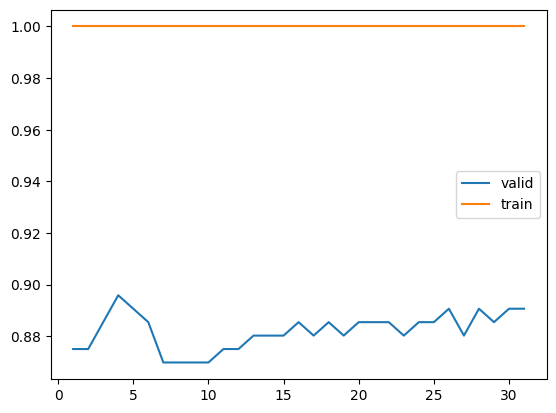

[0.875, 0.875, 0.8854166666666666, 0.8958333333333334, 0.890625, 0.8854166666666666, 0.8697916666666666, 0.8697916666666666, 0.8697916666666666, 0.8697916666666666, 0.875, 0.875, 0.8802083333333334, 0.8802083333333334, 0.8802083333333334, 0.8854166666666666, 0.8802083333333334, 0.8854166666666666, 0.8802083333333334, 0.8854166666666666, 0.8854166666666666, 0.8854166666666666, 0.8802083333333334, 0.8854166666666666, 0.8854166666666666, 0.890625, 0.8802083333333334, 0.890625, 0.8854166666666666, 0.890625, 0.890625]
0.8958333333333334
4
0.890625


In [69]:
binary_data = data.BinaryData()
ks = list(range(1, 32))
accuracies_train = []
accuracies_valid = []
for k in ks:
    #BEGIN 
    neighbors_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, weights="distance",metric='minkowski', p=2,)
    neighbors_model.fit(binary_data.X_train, binary_data.y_train)
    predicted_label = neighbors_model.predict(binary_data.X_train)
    accuracies_train.append(sklearn.metrics.accuracy_score(binary_data.y_train, predicted_label))
    predicted_label = neighbors_model.predict(binary_data.X_valid)
    accuracies_valid.append(sklearn.metrics.accuracy_score(binary_data.y_valid, predicted_label))
    #END
plt.plot(ks, accuracies_valid, label="valid")
plt.plot(ks, accuracies_train, label="train")
plt.legend()
plt.show()
print(accuracies_valid)
print(np.max(accuracies_valid))
print(accuracies_valid.index(max(accuracies_valid))+1)

neighbors_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=4, weights="distance",metric='minkowski', p=2,)
neighbors_model.fit(binary_data.X_train, binary_data.y_train)
predicted_label = neighbors_model.predict(binary_data.X_test)
print(sklearn.metrics.accuracy_score(binary_data.y_test, predicted_label))

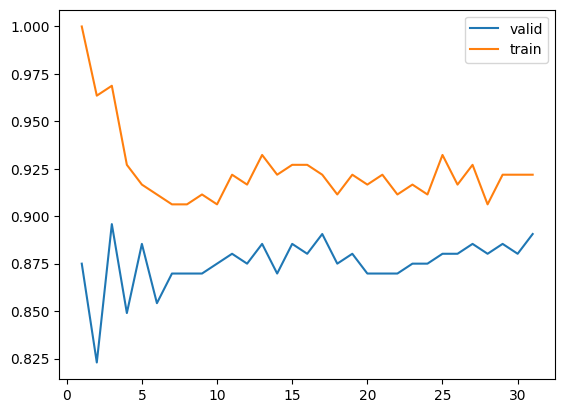

[1.0, 0.9635416666666666, 0.96875, 0.9270833333333334, 0.9166666666666666, 0.9114583333333334, 0.90625, 0.90625, 0.9114583333333334, 0.90625, 0.921875, 0.9166666666666666, 0.9322916666666666, 0.921875, 0.9270833333333334, 0.9270833333333334, 0.921875, 0.9114583333333334, 0.921875, 0.9166666666666666, 0.921875, 0.9114583333333334, 0.9166666666666666, 0.9114583333333334, 0.9322916666666666, 0.9166666666666666, 0.9270833333333334, 0.90625, 0.921875, 0.921875, 0.921875]
[0.875, 0.8229166666666666, 0.8958333333333334, 0.8489583333333334, 0.8854166666666666, 0.8541666666666666, 0.8697916666666666, 0.8697916666666666, 0.8697916666666666, 0.875, 0.8802083333333334, 0.875, 0.8854166666666666, 0.8697916666666666, 0.8854166666666666, 0.8802083333333334, 0.890625, 0.875, 0.8802083333333334, 0.8697916666666666, 0.8697916666666666, 0.8697916666666666, 0.875, 0.875, 0.8802083333333334, 0.8802083333333334, 0.8854166666666666, 0.8802083333333334, 0.8854166666666666, 0.8802083333333334, 0.890625]


In [46]:
ks = list(range(1, 32))
accuracies_train = []
accuracies_valid = []
for k in ks:
    neighbors_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    neighbors_model.fit(binary_data.X_train, binary_data.y_train)
    # knn = KNNClassifier(k).fit(binary_data.X_train, binary_data.y_train)
    predicted_valid = neighbors_model.predict(binary_data.X_valid)
    predicted_train = neighbors_model.predict(binary_data.X_train)
    accuracies_train.append(sklearn.metrics.accuracy_score(binary_data.y_train, predicted_train))
    accuracies_valid.append(sklearn.metrics.accuracy_score(binary_data.y_valid, predicted_valid))
    #BEGIN 
    # code here
    #END
plt.plot(ks, accuracies_valid, label="valid")
plt.plot(ks, accuracies_train, label="train")
plt.legend()
plt.show()

print(accuracies_train)
print(accuracies_valid)

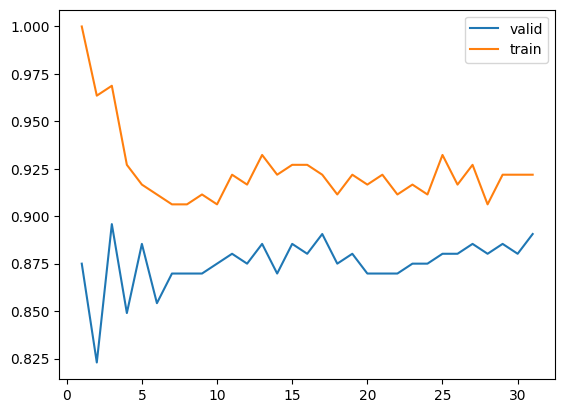

In [47]:
ks = list(range(1, 32))
model_accuracies_train = []
model_accuracies_valid = []
for k in ks:
    knn = KNNClassifier(k).fit(binary_data.X_train, binary_data.y_train)
    model_accuracies_train.append(knn.accuracy(binary_data.X_train, binary_data.y_train))
    model_accuracies_valid.append(knn.accuracy(binary_data.X_valid, binary_data.y_valid))
    #BEGIN 
    # code here
    #END
plt.plot(ks, model_accuracies_valid, label="valid")
plt.plot(ks, model_accuracies_train, label="train")
plt.legend()
plt.show()

In [48]:
if np.allclose(accuracies_train, model_accuracies_train, atol=1e-5):
    print("Training Accuracies match")
if np.allclose(accuracies_valid, model_accuracies_valid, atol=1e-5):
    print("Validation accuracies match")

Training Accuracies match
Validation accuracies match


In [50]:
binary_data = data.BinaryData()
# neighbors_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3, weights="distance")
neighbors_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
neighbors_model.fit(binary_data.X_train, binary_data.y_train)
# neighbors_model.fit(features, labels)

predicted_label = neighbors_model.predict(binary_data.X_test)
# print(predicted_label)


knn = KNNClassifier(3).fit(binary_data.X_train, binary_data.y_train)
pred = knn.predict(binary_data.X_valid)
# print(pred)

# if np.allclose(pred, predicted_label, atol=1e-5):
#     print(True)

c_matrix_lib = sklearn.metrics.confusion_matrix(binary_data.y_test, predicted_label)
c_matrix_own = knn.confusion_matrix(binary_data.X_valid, binary_data.y_valid)

print("library one")
print(c_matrix_lib)
# print("personal one")
# print(c_matrix_own)

# predicted_label = neighbors_model.predict(test_points)
# print(predicted_label)

# c_matrix = sklearn.metrics.confusion_matrix(np.array([1, -1, -1, 1, -1]), predicted_label)
# print(c_matrix)

# accuracy = neighbors_model.score(binary_data.X_train, binary_data.y_train)
accuracy = sklearn.metrics.accuracy_score(binary_data.y_test, predicted_label)
print(accuracy)


library one
[[81  2]
 [19 90]]
0.890625


In [55]:
import os

class DigitData(object):

    def __init__(self):
        current_folder = "/Users/ashutoshgandhi/Desktop/ML/PS1_Base_5622/data"
        loaded = np.load(os.path.join(current_folder, "mnist.npz"))
        self.images = images = loaded["images"].reshape(-1, 28 * 28)
        self.labels = labels = loaded["labels"]
        train_size = 1000
        valid_size = 500
        test_size = 500
        self.X_train, self.y_train = images[:train_size], labels[:train_size]
        self.X_valid, self.y_valid = images[train_size: train_size + valid_size], labels[
                                                                                  train_size: train_size + valid_size]
        self.X_test, self.y_test = (images[train_size + valid_size:train_size + valid_size + test_size],
                                    labels[train_size + valid_size: train_size + valid_size + test_size])

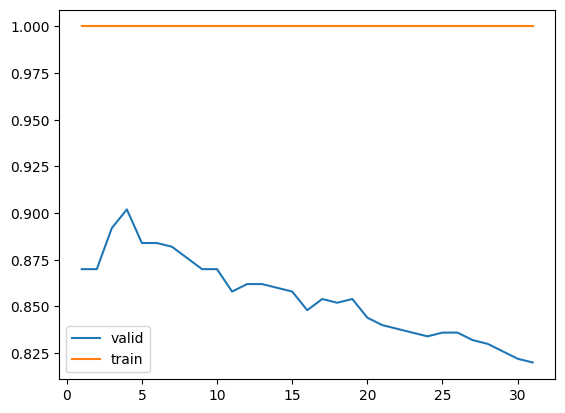

0.902
3
0.894


In [65]:
dig_data = data.DigitData()
ks = list(range(1, 32))
accuracies_train = []
accuracies_valid = []
for k in ks:
    #BEGIN 
    neighbors_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, weights="distance",metric='minkowski', p=2)
    neighbors_model.fit(dig_data.X_train, dig_data.y_train)
    predicted_label = neighbors_model.predict(dig_data.X_train)
    accuracies_train.append(sklearn.metrics.accuracy_score(dig_data.y_train, predicted_label))
    predicted_label = neighbors_model.predict(dig_data.X_valid)
    accuracies_valid.append(sklearn.metrics.accuracy_score(dig_data.y_valid, predicted_label))
    #END
plt.plot(ks, accuracies_valid, label="valid")
plt.plot(ks, accuracies_train, label="train")
plt.legend()
plt.show()
print(np.max(accuracies_valid))
print(accuracies_valid.index(max(accuracies_valid)))


neighbors_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=4, weights="distance",metric='minkowski', p=2)
neighbors_model.fit(dig_data.X_train, dig_data.y_train)
predicted_label = neighbors_model.predict(dig_data.X_test)
accuracy = sklearn.metrics.accuracy_score(dig_data.y_test, predicted_label)

print(accuracy)

In [63]:
dig_data = data.DigitData()
neighbors_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=4)
neighbors_model.fit(dig_data.X_train, dig_data.y_train)

y_true = neighbors_model.predict(dig_data.X_valid)
# print(y_true)

knn = KNNClassifier(4).fit(dig_data.X_train, dig_data.y_train)
y_pred = knn.predict(dig_data.X_test)
# print(y_pred)

accuracy = sklearn.metrics.accuracy_score(dig_data.y_valid, y_true)
print(accuracy)

c_matrix = knn.confusion_matrix(dig_data.X_valid, dig_data.y_valid)
# print(c_matrix)

pred_accuracy = knn.accuracy(dig_data.X_valid, dig_data.y_valid)
print(pred_accuracy)

# pred_accuracy = knn.accuracy(dig_data.X_test, dig_data.y_test)
# print(pred_accuracy)

0.89
0.89
